Epoch 1/100


C:\Users\Manali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5719.7544 - val_loss: 5544.4468
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5400.6055 - val_loss: 5228.5762
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5043.3447 - val_loss: 4452.9204
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4129.8965 - val_loss: 3071.4612
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2659.8828 - val_loss: 1586.4347
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1350.3689 - val_loss: 848.5121
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 764.1835 - val_loss: 739.3185
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 709.8747 - val_loss: 716.9201
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 683.2950 - val_loss: 694.2491
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 641.6586 - val_loss: 671.0513
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 665.9973 - val_loss: 646.5772
Epoch 12/100
34/34 ━

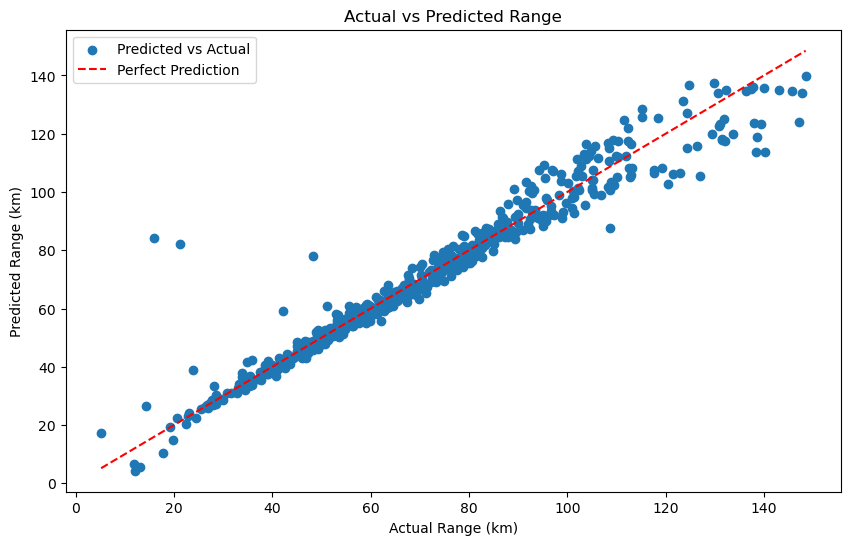

Enter SOC:  76
Enter Voltage:  50
Enter PC:  4
Enter Power:  3
Enter Speed:  30


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Range: 65.47 km


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('C:/Users/Manali/Downloads/Cleaned_Data.csv')  # Modify this path as per your file location

# Check for any zero or very small values in 'E_per_km' to avoid division errors
data['E_per_km'] = data['E_per_km'].replace(0, np.nan)  # Replace 0s with NaN if they exist
data = data.dropna(subset=['E_per_km', 'E_remaining'])  # Drop rows where E_per_km or E_remaining is NaN

# Create a 'Range' column based on 'E_remaining' and 'E_per_km'
data['Range_Km'] = data['E_remaining'] / data['E_per_km']

# Now select relevant columns
filtered_data = data[['Pack SoC', 'Voltage', 'PC', 'input_power', 'speed', 'Range_Km']]

# Define input features and the target variable (Range)
X = filtered_data[['Pack SoC', 'Voltage', 'PC', 'input_power', 'speed']].values
y = filtered_data['Range_Km'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a feed-forward neural network
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))  # 5 input features: SOC, Voltage, PC, Power, Speed
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for Range prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {loss}")

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate additional evaluation metrics: MAE, MSE, and R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted range
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Range (km)')
plt.ylabel('Predicted Range (km)')
plt.title('Actual vs Predicted Range')
plt.legend()
plt.show()

# Function to take user input and predict the range
def predict_range():
    try:
        # Take inputs from the user with default or skipped values if not provided
        soc = input("Enter SOC: ") 
        pack_vol = input("Enter Voltage: ") 
        pc = input("Enter PC: ") 
        power = input("Enter Power: ") 
        speed = input("Enter Speed: ") 
       
        # Convert inputs to floats
        soc = float(soc)
        pack_vol = float(pack_vol)
        pc = float(pc)
        power = float(power)
        speed = float(speed)
       
        # Prepare the input for prediction
        user_input = np.array([[soc, pack_vol, pc, power, speed]])
        user_input_scaled = scaler.transform(user_input)

        # Make prediction
        range_prediction = model.predict(user_input_scaled)
        print(f"Predicted Range: {range_prediction[0][0]:.2f} km")
       
    except ValueError:
        print("Please enter valid numerical values.")

# Run the prediction function
predict_range()


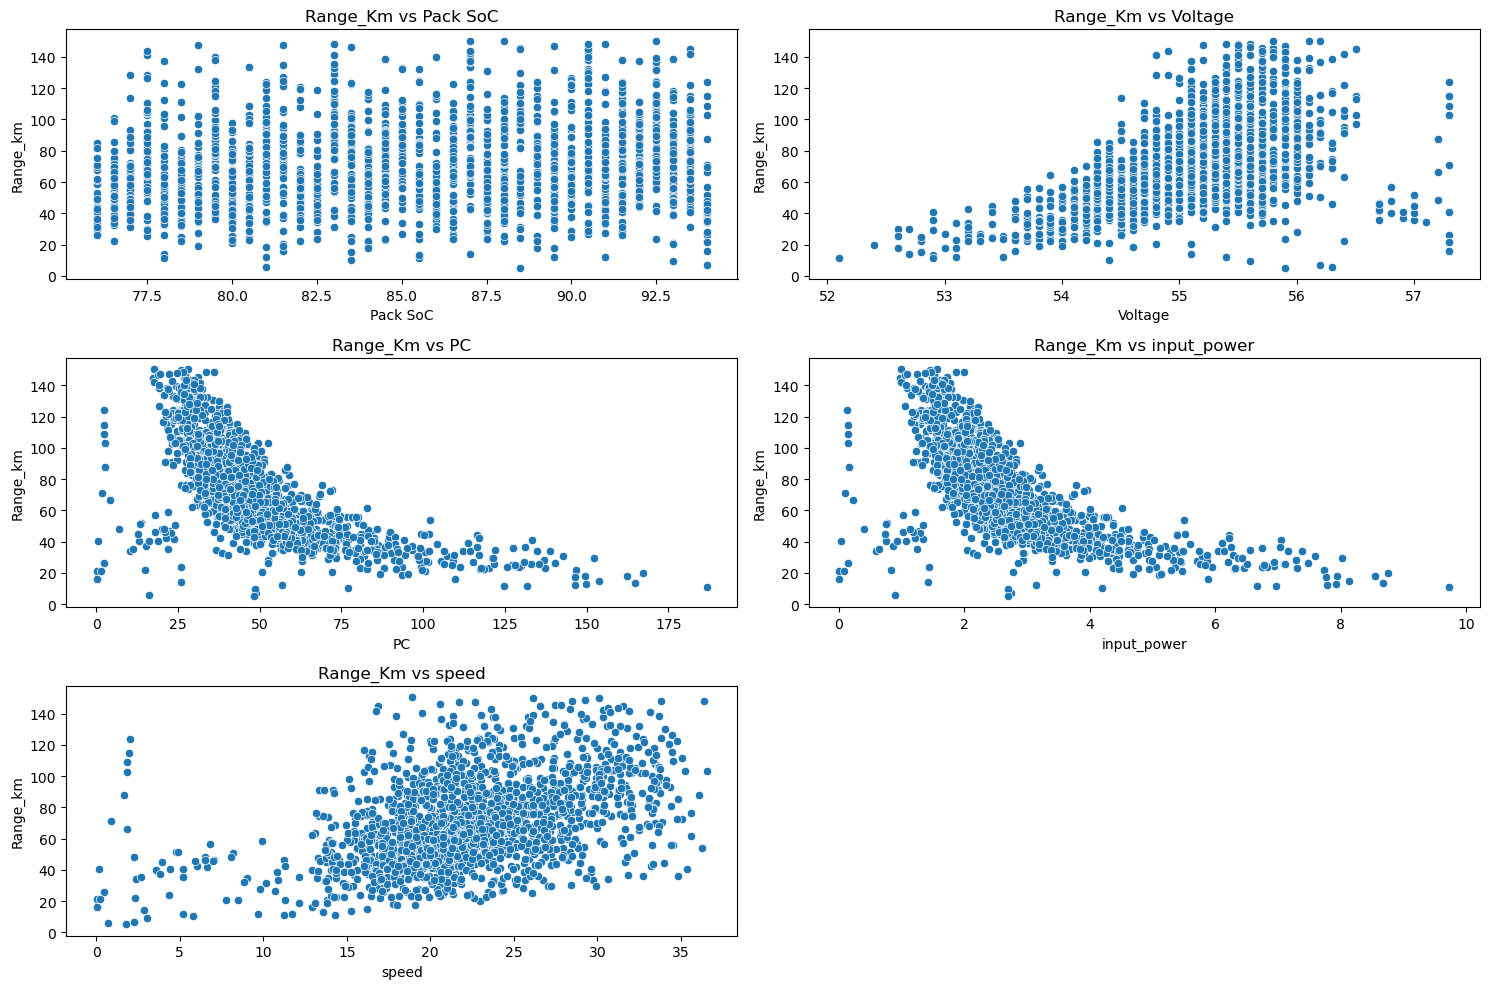

Threshold values where Range_Km behaves abnormally:
Series([], Name: Range_km, dtype: float64)


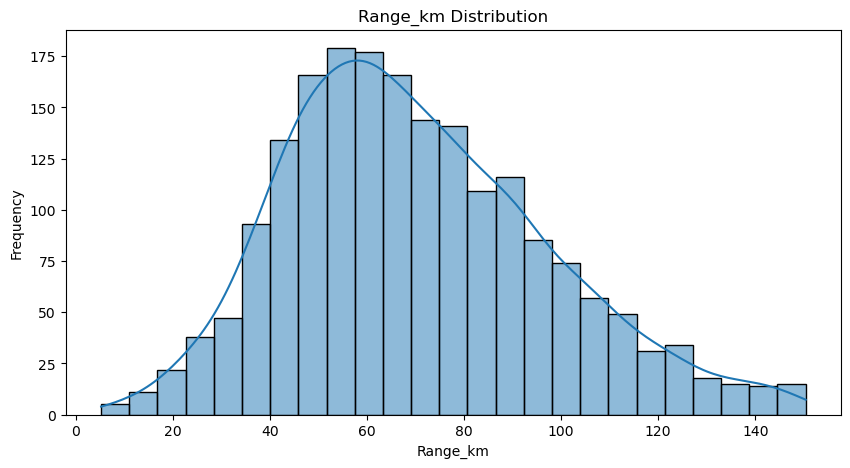

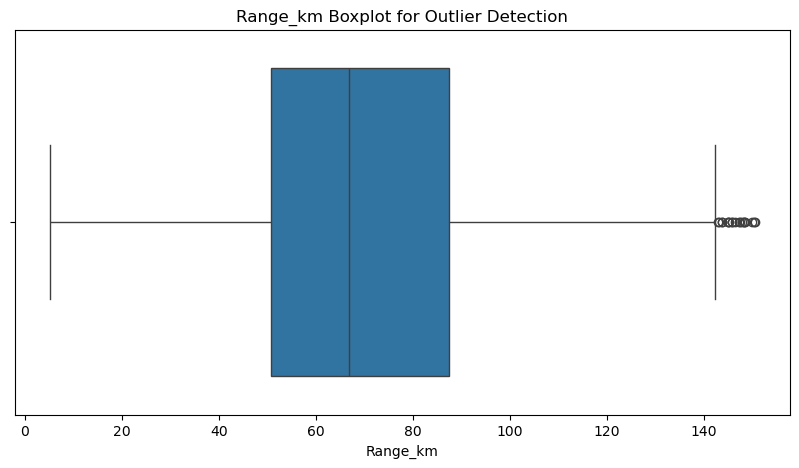

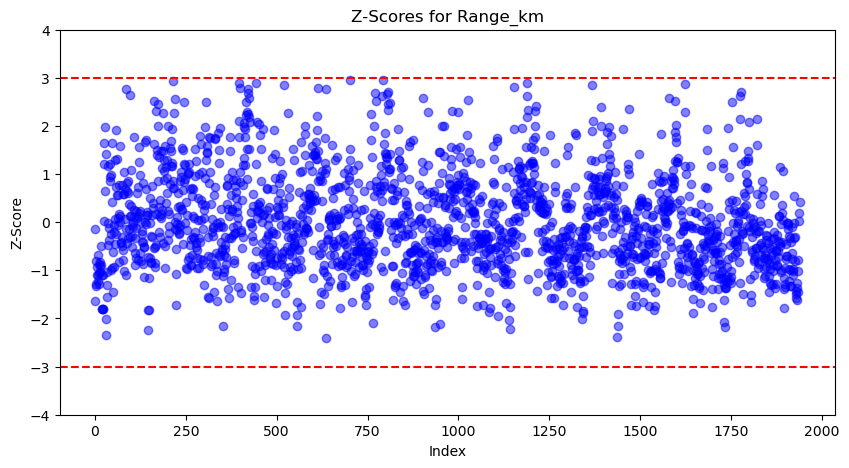

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data = pd.read_csv('C:/Users/Manali/Downloads/Cleaned_Updated_Data_no_range_km.csv')

# Ensure no NaN values in Range_Km column (if needed)
data = data.dropna(subset=['Range_km'])

# Define the columns to analyze Range_Km against
features = ['Pack SoC', 'Voltage', 'PC', 'input_power', 'speed']

# Plot graphs: Range_Km vs. Each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=data[feature], y=data['Range_km'])
    plt.title(f'Range_Km vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Range_km')

plt.tight_layout()
plt.show()

# Statistical outlier detection to find abnormal range values
def find_thresholds(series):
    z_scores = stats.zscore(series)
    abs_z_scores = np.abs(z_scores)
    # Points where z-score is greater than 3 are considered outliers
    threshold_values = series[abs_z_scores > 3]
    return threshold_values, z_scores

# Find thresholds for Range_Km
range_thresholds, z_scores = find_thresholds(data['Range_km'])

print("Threshold values where Range_Km behaves abnormally:")
print(range_thresholds)

# Plot histogram to visualize Range_Km distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Range_km'], kde=True)
plt.title('Range_km Distribution')
plt.xlabel('Range_km')
plt.ylabel('Frequency')
plt.show()

# Boxplot to further observe outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Range_km'])
plt.title('Range_km Boxplot for Outlier Detection')
plt.show()

# Plot z-scores to identify outliers visually
plt.figure(figsize=(10, 5))
plt.scatter(data.index, z_scores, color='blue', alpha=0.5)
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-3, color='red', linestyle='--')
plt.title('Z-Scores for Range_km')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.ylim(-4, 4)
plt.show()


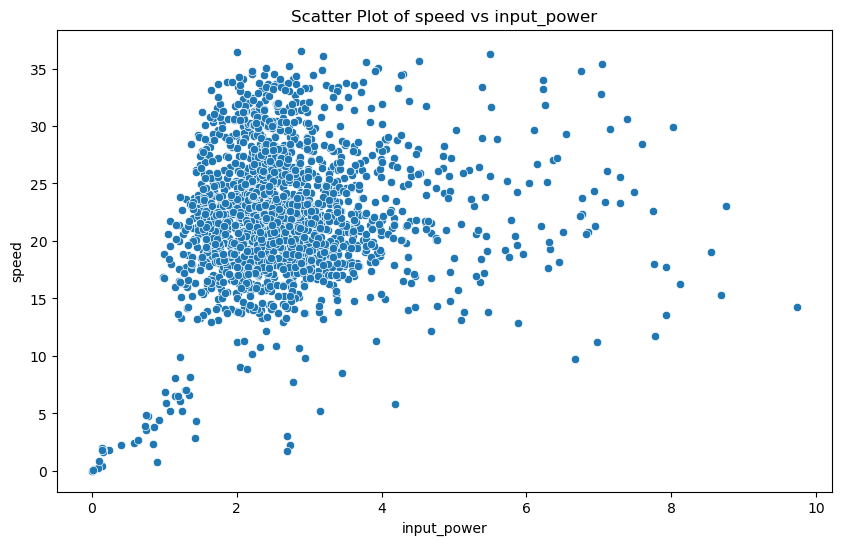

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/Users/Manali/Downloads/Cleaned_Updated_Data_no_range_km.csv')

# Specify the two variables to plot
x_variable = 'input_power'  # Replace with your desired variable name
y_variable = 'speed'   # Replace with your desired variable name

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=x_variable, y=y_variable)
plt.title(f'Scatter Plot of {y_variable} vs {x_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.show()
